Imports

In [ ]:
from matplotlib import pyplot as plt
from VascularNetwork import VascularNetwork
from Vessel import Vessel


Parameters and basic components

<img src="vessels.png"/>

In [16]:
eta = 3.5e-3
mmgh = 133.322
Pin = 100*mmgh
Pout = 10*mmgh
L_aorta = 0.3
r_aorta = 0.012
L_branch = 0.2
r_branch = 0.006
L_arteolie = 0.02
r_arteolie = 0.015

aorta = Vessel(L=L_aorta, r=r_aorta, eta=eta)
branch1 = Vessel(L=L_branch, r=r_branch, eta=eta)
branch2 = Vessel(L=L_branch, r=r_branch, eta=eta)
arteolies = [Vessel(L=L_arteolie, r=r_arteolie, eta=eta) for _ in range(4)]

R_total = VascularNetwork.calculate_basic_network(arteolies, [branch1, branch2], aorta)
Q_tot = (Pin-Pout)/R_total

A change in the diameter of the arteol (or other component) causes a linear change in flow.

For r_arteolie=0.0135 Q_tot [ml/s]: 14668.8019
For r_arteolie=0.015 Q_tot [ml/s]: 14677.0807
For r_arteolie=0.0165 Q_tot [ml/s]: 14682.0919


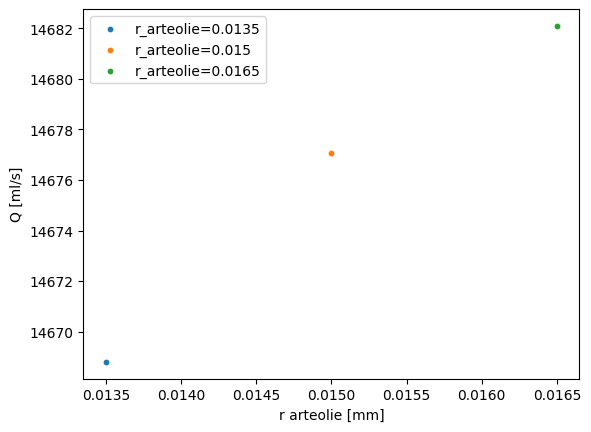

In [17]:
for pct in [0.9, 1.0, 1.1]:
    pct_arteolies = [Vessel(L=L_arteolie, r=r_arteolie * pct, eta=eta) for _ in range(4)]
    pct_R_total = VascularNetwork.calculate_basic_network(pct_arteolies, [branch1, branch2], aorta)
    pct_Q_tot = (Pin-Pout)/pct_R_total
    plt.scatter((r_arteolie * pct), (pct_Q_tot*1e6), label=f"r_arteolie={r_arteolie * pct}", s=10)
    print(f'For r_arteolie={r_arteolie * pct} Q_tot [ml/s]: {pct_Q_tot*1e6:.4f}')

plt.xlabel('r arteolie [mm]')
plt.ylabel('Q [ml/s]')
plt.legend()
plt.show()


As can be seen in the graph, in the case of anemia (lower viscosity), hydrodynamic resistance is lower, and thus blood flow increases.

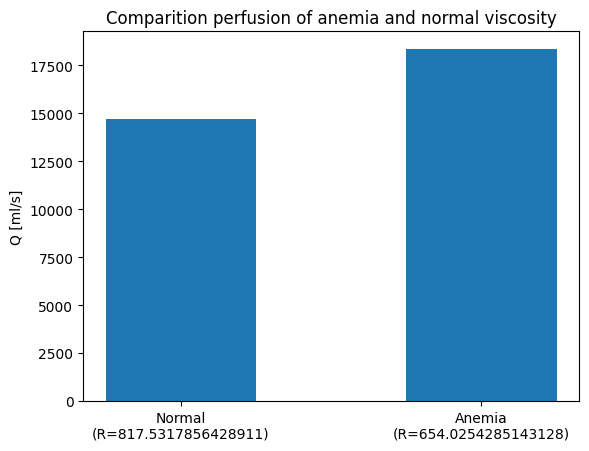

In [ ]:
anemia_eta = 2.8e-3
anemia_aorta = Vessel(L=L_aorta, r=r_aorta, eta=anemia_eta)
anemia_branch1 = Vessel(L=L_branch, r=r_branch, eta=anemia_eta)
anemia_branch2 = Vessel(L=L_branch, r=r_branch, eta=anemia_eta)
anemia_arteolies = [Vessel(L=0.02, r=r_arteolie, eta=anemia_eta) for _ in range(4)]
anemia_R_total = VascularNetwork.calculate_basic_network(anemia_arteolies,
                                                         [anemia_branch1, anemia_branch2],
                                                         anemia_aorta)
anemia_Q_tot = (Pin-Pout)/anemia_R_total

labels = [f'Normal\n(R={R_total / 1000:.0f})', f'Anemia\n(R={anemia_R_total / 1000:.0f})']
y_values = [Q_tot*1e6, anemia_Q_tot*1e6]
plt.bar(labels, y_values, width=0.5)
plt.title('Comparition perfusion of anemia and normal viscosity')
plt.ylabel('Q [ml/s]')
plt.show()

Control questions:
1. Why does a slight narrowing of the vessels (a 10% decrease) cause a large
increase in resistance?
Because in the formula for the hydrodynamic resistance of a vessel, its diameter is raised to the fourth power.
2. What will change if the two branches have different lengths L?
An increase in length L causes an increase in hydrodynamic resistance, and the final flow decreases. (Example below)

In [20]:
newL_aorta = Vessel(L=L_aorta, r=r_aorta, eta=eta)
newL_branch1 = Vessel(L=L_branch, r=r_branch, eta=eta)
newL_branch2 = Vessel(L=L_branch * 1.1, r=r_branch, eta=eta)
newL_arteolies = [Vessel(L=L_arteolie, r=r_arteolie, eta=eta) for _ in range(4)]

newL_R_total = VascularNetwork.calculate_basic_network(newL_arteolies, [newL_branch1, newL_branch2], newL_aorta)
newL_Q_tot = (Pin-Pout)/newL_R_total
print(f"{newL_branch1.R=:.0f}")
print(f"{newL_branch2.R=:.0f}")
print(f"{Q_tot=:.4f}")
print(f"{newL_Q_tot=:.4f}")

newL_branch1.R=1375413
newL_branch2.R=1512954
Q_tot=0.0147
newL_Q_tot=0.0141
